In [1]:
import numpy as np
import pandas as pd
from copairs import map
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import umap
import seaborn as sb

/home/nick/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# CellProfiler: MAD (per plate for all samples) + feature selection 

well_level_profiles_cellprofiler = pd.read_csv('./baseline/cellprofiler_robustized.csv.gz')
target2_metadata = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter = '\t')
compound_metadata = pd.read_csv('compound.csv.gz')
target2_metadata = pd.merge(target2_metadata, compound_metadata, left_on='InChIKey', right_on='Metadata_InChIKey', how = 'right')
well_level_profiles_cellprofiler = pd.merge(well_level_profiles_cellprofiler, target2_metadata[['target', 'pert_type', 'Metadata_JCP2022']], left_on = 'Metadata_Treatment', right_on = 'Metadata_JCP2022' )

subset = pd.read_csv('./baseline/subset_single.csv')
well_level_profiles_cellprofiler.Metadata_Plate = well_level_profiles_cellprofiler.Metadata_Plate.astype(str)
well_level_profiles_cellprofiler = pd.merge(well_level_profiles_cellprofiler, subset, on=["Metadata_Source", "Metadata_Batch", "Metadata_Plate"], how='right' )
well_level_profiles_cellprofiler = well_level_profiles_cellprofiler[(well_level_profiles_cellprofiler.pert_type == 'trt') | (well_level_profiles_cellprofiler.Metadata_Treatment == 'JCP2022_033924')]

well_level_profiles_cellprofiler.drop_duplicates(subset=["Metadata_Source", "Metadata_Batch", "Metadata_Plate", "Metadata_Well"], inplace=True)
well_level_profiles_cellprofiler.reset_index(inplace=True, drop=True)
feature_columns_c = [i for i in well_level_profiles_cellprofiler.columns if 'Metadata_' not in i and i != 'target' and i != 'pert_type']

well_level_profiles_cellprofiler["Metadata_treatment_index"] = well_level_profiles_cellprofiler.index
well_level_profiles_cellprofiler.loc[well_level_profiles_cellprofiler["Metadata_JCP2022"] == "JCP2022_033924", "Metadata_treatment_index"] = -1
well_level_profiles_cellprofiler.insert(0, "Metadata_treatment_index", well_level_profiles_cellprofiler.pop("Metadata_treatment_index"))
well_level_profiles_cellprofiler.drop(columns = ['Metadata_JCP2022'], inplace = True)
well_level_profiles_cellprofiler = well_level_profiles_cellprofiler.rename(columns = {'target': 'Metadata_Target', 'pert_type':'Metadata_pert_type '})

/tmp/ipykernel_36593/288676604.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  well_level_profiles_cellprofiler = pd.read_csv('./baseline/cellprofiler_robustized.csv.gz')


In [3]:
# Cell Painting CNN Robustized

well_level_profiles_cpcnn_robustized = pd.read_csv('./well_level_profiles_cpcnn_robustized.csv.gz')
target2_metadata = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter = '\t')
compound_metadata = pd.read_csv('compound.csv.gz')
target2_metadata = pd.merge(target2_metadata, compound_metadata, left_on='InChIKey', right_on='Metadata_InChIKey', how = 'right')
well_level_profiles_cpcnn_robustized = pd.merge(well_level_profiles_cpcnn_robustized, target2_metadata[['target', 'pert_type', 'Metadata_JCP2022']], left_on = 'Metadata_Treatment', right_on = 'Metadata_JCP2022' )

subset = pd.read_csv('./baseline/subset_single.csv')
well_level_profiles_cpcnn_robustized.Metadata_Plate = well_level_profiles_cpcnn_robustized.Metadata_Plate.astype(str)
well_level_profiles_cpcnn_robustized = pd.merge(well_level_profiles_cpcnn_robustized, subset, on=["Metadata_Source", "Metadata_Batch", "Metadata_Plate"], how='right' )
well_level_profiles_cpcnn_robustized = well_level_profiles_cpcnn_robustized[(well_level_profiles_cpcnn_robustized.pert_type == 'trt') | (well_level_profiles_cpcnn_robustized.Metadata_Treatment == 'JCP2022_033924')]

well_level_profiles_cpcnn_robustized.drop_duplicates(subset=["Metadata_Source", "Metadata_Batch", "Metadata_Plate", "Metadata_Well"], inplace=True)
well_level_profiles_cpcnn_robustized.reset_index(inplace=True, drop=True)
feature_columns_c = [i for i in well_level_profiles_cpcnn_robustized.columns if 'Metadata_' not in i and i != 'target' and i != 'pert_type']

well_level_profiles_cpcnn_robustized["Metadata_treatment_index"] = well_level_profiles_cpcnn_robustized.index
well_level_profiles_cpcnn_robustized.loc[well_level_profiles_cpcnn_robustized["Metadata_JCP2022"] == "JCP2022_033924", "Metadata_treatment_index"] = -1
well_level_profiles_cpcnn_robustized.insert(0, "Metadata_treatment_index", well_level_profiles_cpcnn_robustized.pop("Metadata_treatment_index"))
well_level_profiles_cpcnn_robustized.drop(columns = ['Metadata_JCP2022'], inplace = True)
well_level_profiles_cpcnn_robustized = well_level_profiles_cpcnn_robustized.rename(columns = {'target': 'Metadata_Target', 'pert_type':'Metadata_pert_type '})

In [4]:
well_level_profiles_cpcnn_spherized = pd.read_csv('./well_level_profiles_cpcnn_spherized.csv')
target2_metadata = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter = '\t')
compound_metadata = pd.read_csv('compound.csv.gz')
target2_metadata = pd.merge(target2_metadata, compound_metadata, left_on='InChIKey', right_on='Metadata_InChIKey', how = 'right')
well_level_profiles_cpcnn_spherized = pd.merge(well_level_profiles_cpcnn_spherized, target2_metadata[['target', 'pert_type', 'Metadata_JCP2022']], left_on = 'Metadata_Treatment', right_on = 'Metadata_JCP2022' )

subset = pd.read_csv('./baseline/subset_single.csv')
well_level_profiles_cpcnn_spherized.Metadata_Plate = well_level_profiles_cpcnn_spherized.Metadata_Plate.astype(str)
well_level_profiles_cpcnn_spherized = pd.merge(well_level_profiles_cpcnn_spherized, subset, on=["Metadata_Source", "Metadata_Batch", "Metadata_Plate"], how='right' )
well_level_profiles_cpcnn_spherized = well_level_profiles_cpcnn_spherized[(well_level_profiles_cpcnn_spherized.pert_type == 'trt') | (well_level_profiles_cpcnn_spherized.Metadata_Treatment == 'JCP2022_033924')]

well_level_profiles_cpcnn_spherized.drop_duplicates(subset=["Metadata_Source", "Metadata_Batch", "Metadata_Plate", "Metadata_Well"], inplace=True)
well_level_profiles_cpcnn_spherized.reset_index(inplace=True, drop=True)
feature_columns_c = [i for i in well_level_profiles_cpcnn_spherized.columns if 'Metadata_' not in i and i != 'target' and i != 'pert_type']

well_level_profiles_cpcnn_spherized["Metadata_treatment_index"] = well_level_profiles_cpcnn_spherized.index
well_level_profiles_cpcnn_spherized.loc[well_level_profiles_cpcnn_spherized["Metadata_JCP2022"] == "JCP2022_033924", "Metadata_treatment_index"] = -1
well_level_profiles_cpcnn_spherized.insert(0, "Metadata_treatment_index", well_level_profiles_cpcnn_spherized.pop("Metadata_treatment_index"))
well_level_profiles_cpcnn_spherized.drop(columns = ['Metadata_JCP2022'], inplace = True)
well_level_profiles_cpcnn_spherized = well_level_profiles_cpcnn_spherized.rename(columns = {'target': 'Metadata_Target', 'pert_type':'Metadata_pert_type '})

In [5]:
well_level_profiles_cpcnn_spherized_mad = pd.read_csv('./well_level_profiles_cpcnn_spherized_mad.csv')
target2_metadata = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter = '\t')
compound_metadata = pd.read_csv('compound.csv.gz')
target2_metadata = pd.merge(target2_metadata, compound_metadata, left_on='InChIKey', right_on='Metadata_InChIKey', how = 'right')
well_level_profiles_cpcnn_spherized_mad = pd.merge(well_level_profiles_cpcnn_spherized_mad, target2_metadata[['target', 'pert_type', 'Metadata_JCP2022']], left_on = 'Metadata_Treatment', right_on = 'Metadata_JCP2022' )

subset = pd.read_csv('./baseline/subset_single.csv')
well_level_profiles_cpcnn_spherized_mad.Metadata_Plate = well_level_profiles_cpcnn_spherized_mad.Metadata_Plate.astype(str)
well_level_profiles_cpcnn_spherized_mad = pd.merge(well_level_profiles_cpcnn_spherized_mad, subset, on=["Metadata_Source", "Metadata_Batch", "Metadata_Plate"], how='right' )
well_level_profiles_cpcnn_spherized_mad = well_level_profiles_cpcnn_spherized_mad[(well_level_profiles_cpcnn_spherized_mad.pert_type == 'trt') | (well_level_profiles_cpcnn_spherized_mad.Metadata_Treatment == 'JCP2022_033924')]

well_level_profiles_cpcnn_spherized_mad.drop_duplicates(subset=["Metadata_Source", "Metadata_Batch", "Metadata_Plate", "Metadata_Well"], inplace=True)
well_level_profiles_cpcnn_spherized_mad.reset_index(inplace=True, drop=True)
feature_columns_c = [i for i in well_level_profiles_cpcnn_spherized_mad.columns if 'Metadata_' not in i and i != 'target' and i != 'pert_type']

well_level_profiles_cpcnn_spherized_mad["Metadata_treatment_index"] = well_level_profiles_cpcnn_spherized_mad.index
well_level_profiles_cpcnn_spherized_mad.loc[well_level_profiles_cpcnn_spherized_mad["Metadata_JCP2022"] == "JCP2022_033924", "Metadata_treatment_index"] = -1
well_level_profiles_cpcnn_spherized_mad.insert(0, "Metadata_treatment_index", well_level_profiles_cpcnn_spherized_mad.pop("Metadata_treatment_index"))
well_level_profiles_cpcnn_spherized_mad.drop(columns = ['Metadata_JCP2022'], inplace = True)
well_level_profiles_cpcnn_spherized_mad = well_level_profiles_cpcnn_spherized_mad.rename(columns = {'target': 'Metadata_Target', 'pert_type':'Metadata_pert_type '})

/home/nick/miniforge3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

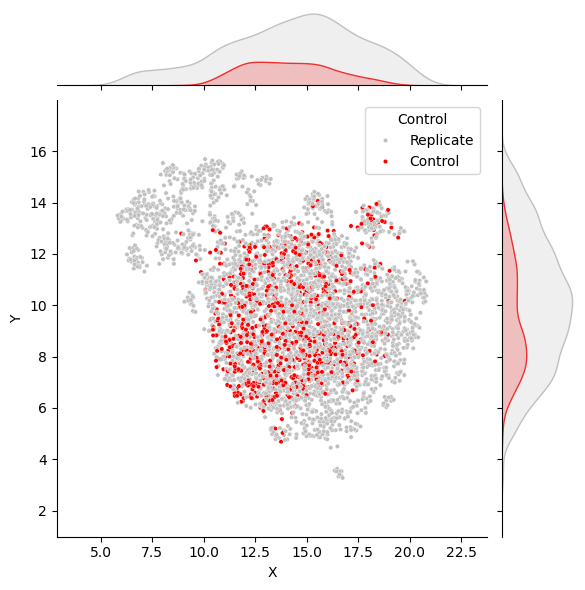

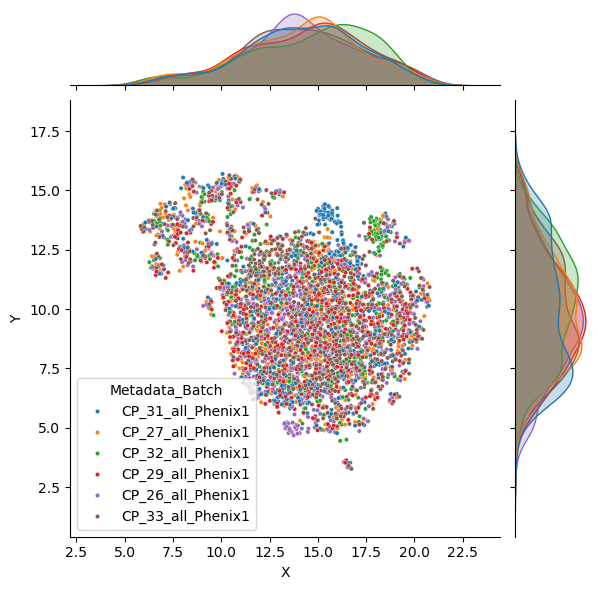

In [24]:
reducer = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.7, metric='correlation')
feature_columns_cp = [i for i in well_level_profiles_cellprofiler.columns if 'Metadata_' not in i and i != 'target' and i != 'pert_type']
embeddings = reducer.fit_transform(well_level_profiles_cellprofiler[feature_columns_cp])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), well_level_profiles_cellprofiler.reset_index()), axis=1)
aux["Control"] = ""
aux.loc[aux["Metadata_Treatment"] == "JCP2022_033924", "Control"] = "Control"
aux.loc[aux["Metadata_Treatment"] != "JCP2022_033924", "Control"] = "Replicate"
plt.figure(figsize=(15,15))
sb.jointplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
sb.jointplot(data=aux, x="X", y="Y", hue="Metadata_Batch", s=10)
plt.show()

/home/nick/miniforge3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

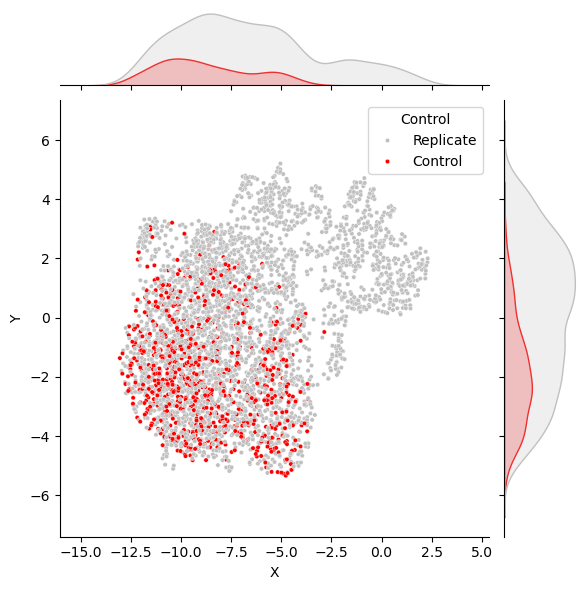

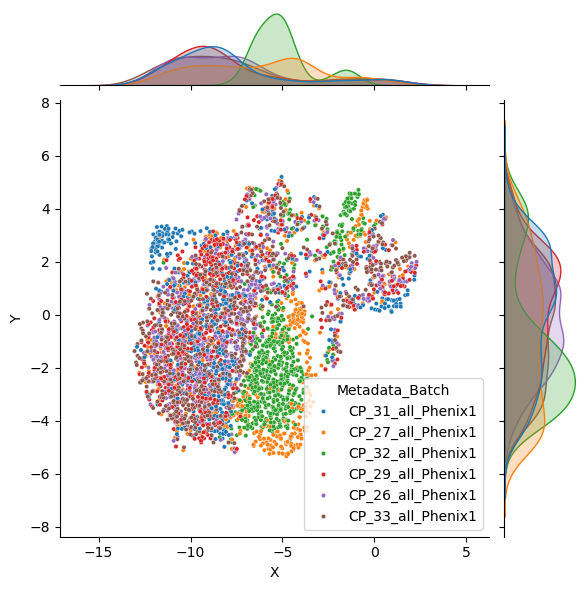

In [6]:
reducer = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.7, metric='correlation')
embeddings = reducer.fit_transform(well_level_profiles_cpcnn_robustized[feature_columns_c])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), well_level_profiles_cpcnn_robustized.reset_index()), axis=1)
aux["Control"] = ""
aux.loc[aux["Metadata_Treatment"] == "JCP2022_033924", "Control"] = "Control"
aux.loc[aux["Metadata_Treatment"] != "JCP2022_033924", "Control"] = "Replicate"
plt.figure(figsize=(15,15))
sb.jointplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
sb.jointplot(data=aux, x="X", y="Y", hue="Metadata_Batch", s=10)
plt.show()

/home/nick/miniforge3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

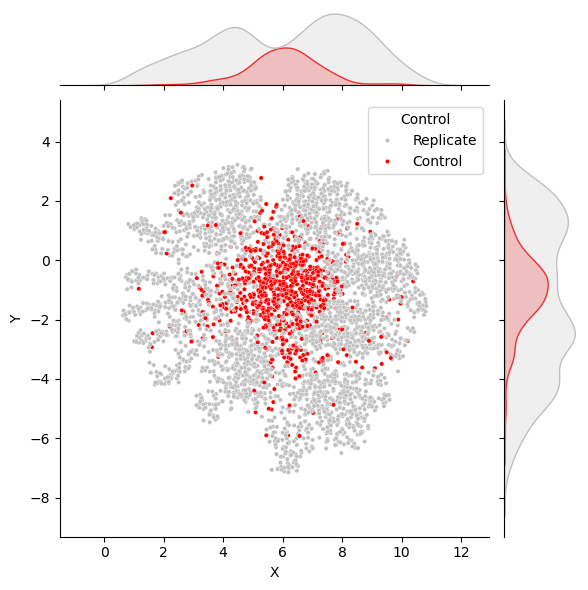

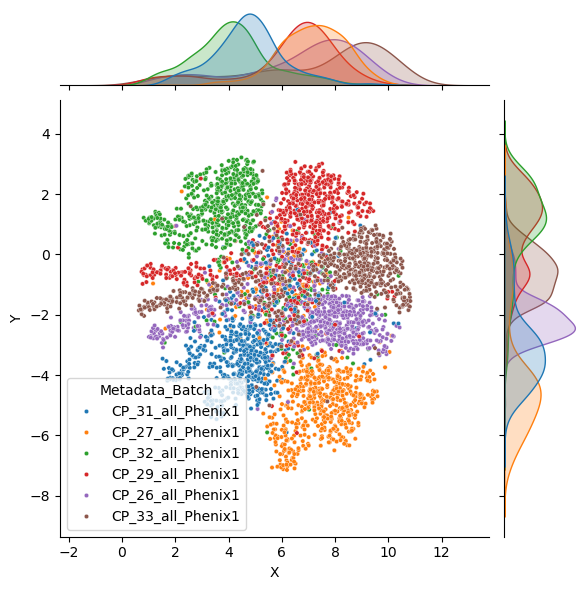

In [7]:
reducer = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.7, metric='correlation')
embeddings = reducer.fit_transform(well_level_profiles_cpcnn_spherized[feature_columns_c])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), well_level_profiles_cpcnn_spherized.reset_index()), axis=1)
aux["Control"] = ""
aux.loc[aux["Metadata_Treatment"] == "JCP2022_033924", "Control"] = "Control"
aux.loc[aux["Metadata_Treatment"] != "JCP2022_033924", "Control"] = "Replicate"
plt.figure(figsize=(15,15))
sb.jointplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
sb.jointplot(data=aux, x="X", y="Y", hue="Metadata_Batch", s=10)
plt.show()

/home/nick/miniforge3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

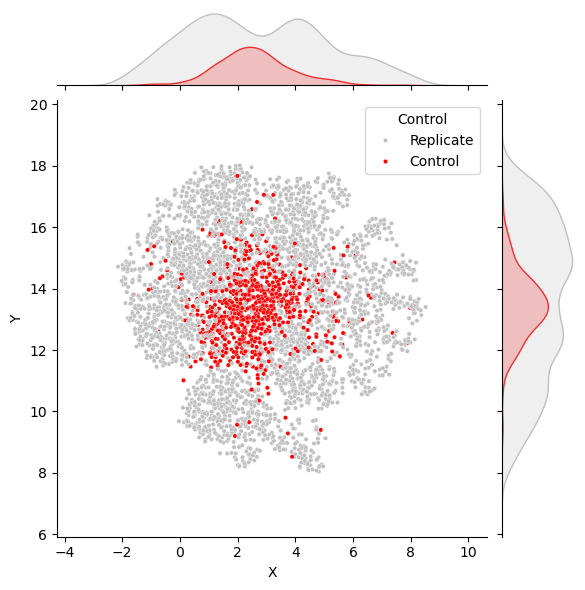

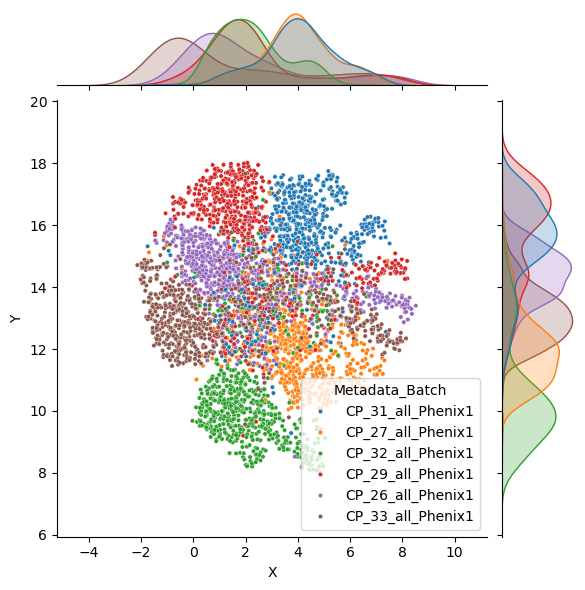

In [8]:
reducer = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.7, metric='correlation')
embeddings = reducer.fit_transform(well_level_profiles_cpcnn_spherized_mad[feature_columns_c])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), well_level_profiles_cpcnn_spherized_mad.reset_index()), axis=1)
aux["Control"] = ""
aux.loc[aux["Metadata_Treatment"] == "JCP2022_033924", "Control"] = "Control"
aux.loc[aux["Metadata_Treatment"] != "JCP2022_033924", "Control"] = "Replicate"
plt.figure(figsize=(15,15))
sb.jointplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
sb.jointplot(data=aux, x="X", y="Y", hue="Metadata_Batch", s=10)
plt.show()

### Phenotypic activity

In [9]:
# positive pairs are replicates of the same treatment
pos_sameby = ["Metadata_Treatment"]
pos_diffby = []
neg_sameby = []
neg_diffby = ["Metadata_Treatment", "Metadata_treatment_index"]

In [10]:
metadata = well_level_profiles_cellprofiler.filter(regex="^Metadata")
profiles = well_level_profiles_cellprofiler.filter(regex="^(?!Metadata)").values
replicate_aps_cp = map.average_precision(metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby)
replicate_aps_cp = replicate_aps_cp.query("Metadata_Treatment != 'JCP2022_033924'") # remove DMSO
replicate_maps_cp = map.mean_average_precision(replicate_aps_cp, pos_sameby, null_size=10000, threshold=0.05, seed=0)
replicate_maps_cp["-log10(p-value)"] = -replicate_maps_cp["corrected_p_value"].apply(np.log10)
replicate_maps_cp[replicate_maps_cp['below_corrected_p'] == True].mean_average_precision.mean()

0.2554481052799131

In [11]:
metadata = well_level_profiles_cpcnn_robustized.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_robustized.filter(regex="^(?!Metadata)").values
replicate_aps_cpcnn_robustized = map.average_precision(metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby)
replicate_aps_cpcnn_robustized = replicate_aps_cpcnn_robustized.query("Metadata_Treatment != 'JCP2022_033924'") # remove DMSO
replicate_maps_cpcnn_robustized = map.mean_average_precision(replicate_aps_cpcnn_robustized, pos_sameby, null_size=10000, threshold=0.05, seed=0)
replicate_maps_cpcnn_robustized["-log10(p-value)"] = -replicate_maps_cpcnn_robustized["corrected_p_value"].apply(np.log10)
replicate_maps_cpcnn_robustized[replicate_maps_cpcnn_robustized['below_corrected_p'] == True].mean_average_precision.mean()

0.24413267439971237

In [12]:
metadata = well_level_profiles_cpcnn_spherized.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_spherized.filter(regex="^(?!Metadata)").values
replicate_aps_cpcnn_spherized = map.average_precision(metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby)
replicate_aps_cpcnn_spherized = replicate_aps_cpcnn_spherized.query("Metadata_Treatment != 'JCP2022_033924'") # remove DMSO
replicate_maps_cpcnn_spherized = map.mean_average_precision(replicate_aps_cpcnn_spherized, pos_sameby, null_size=10000, threshold=0.05, seed=0)
replicate_maps_cpcnn_spherized["-log10(p-value)"] = -replicate_maps_cpcnn_spherized["corrected_p_value"].apply(np.log10)
replicate_maps_cpcnn_spherized[replicate_maps_cpcnn_spherized['below_corrected_p'] == True].mean_average_precision.mean()

0.2424888307779916

In [13]:
metadata = well_level_profiles_cpcnn_spherized_mad.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_spherized_mad.filter(regex="^(?!Metadata)").values
replicate_aps_cpcnn_spherized_mad = map.average_precision(metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby)
replicate_aps_cpcnn_spherize_mad = replicate_aps_cpcnn_spherized_mad.query("Metadata_Treatment != 'JCP2022_033924'") # remove DMSO
replicate_maps_cpcnn_spherized_mad = map.mean_average_precision(replicate_aps_cpcnn_spherized_mad, pos_sameby, null_size=10000, threshold=0.05, seed=0)
replicate_maps_cpcnn_spherized_mad["-log10(p-value)"] = -replicate_maps_cpcnn_spherized_mad["corrected_p_value"].apply(np.log10)
replicate_maps_cpcnn_spherized_mad[replicate_maps_cpcnn_spherized_mad['below_corrected_p'] == True].mean_average_precision.mean()

0.2571714701271628

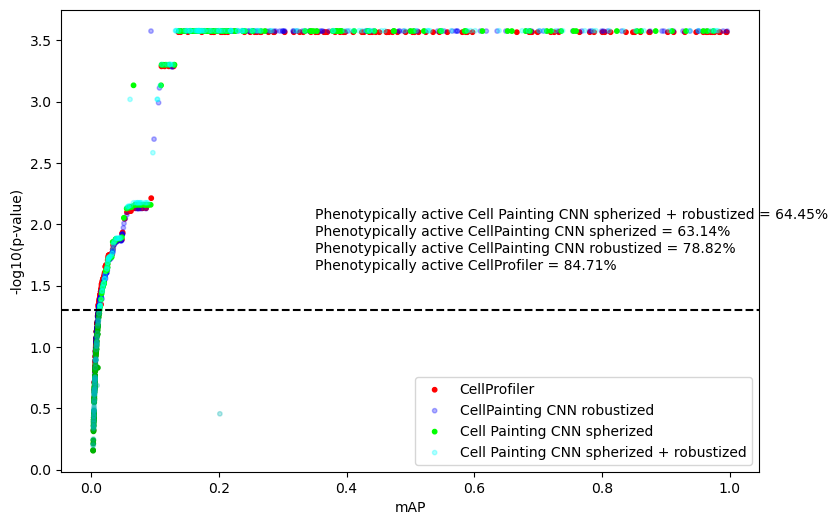

In [14]:
active_ratio_cp = replicate_maps_cp.below_corrected_p.mean()
active_ratio_cpcnn_robustized = replicate_maps_cpcnn_robustized.below_corrected_p.mean()
active_ratio_cpcnn_spherized = replicate_maps_cpcnn_spherized.below_corrected_p.mean()
active_ratio_cpcnn_spherized_mad = replicate_maps_cpcnn_spherized_mad.below_corrected_p.mean()

colors = [(0.7, 0, 0), (1, 0, 0)]
cmr = LinearSegmentedColormap.from_list("Red", colors, N=2)
colors = [(0, 0.7, 0), (0, 1, 0)]
cmg = LinearSegmentedColormap.from_list("Green", colors, N=2)
colors = [(0, 0, 0.7, 0.3), (0, 0, 1, 0.3)]
cmb = LinearSegmentedColormap.from_list("Blue", colors, N=2)
colors = [(0, 0.7, 0.7, 0.3), (0, 1, 1, 0.3)]
cmgb = LinearSegmentedColormap.from_list("GB", colors, N=2)

plt.figure(figsize=(9,6))
plt.scatter(data=replicate_maps_cp, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmr, s=10, label = 'CellProfiler')
plt.scatter(data=replicate_maps_cpcnn_robustized, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmb, s=10, label = 'CellPainting CNN robustized')
plt.scatter(data=replicate_maps_cpcnn_spherized, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmg, s=10, label = 'Cell Painting CNN spherized')
plt.scatter(data=replicate_maps_cpcnn_spherized_mad, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmgb, s=10, label = 'Cell Painting CNN spherized + robustized')

plt.xlabel("mAP")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color="black", linestyle="--")
plt.text(0.35, 1.66, f"Phenotypically active CellProfiler = {100*active_ratio_cp:.2f}%", va="center", ha="left")
plt.text(0.35, 1.8, f"Phenotypically active CellPainting CNN robustized = {100*active_ratio_cpcnn_robustized:.2f}%", va="center", ha="left")
plt.text(0.35, 1.94, f"Phenotypically active CellPainting CNN spherized = {100*active_ratio_cpcnn_spherized:.2f}%", va="center", ha="left")
plt.text(0.35, 2.08, f"Phenotypically active Cell Painting CNN spherized + robustized = {100*active_ratio_cpcnn_spherized_mad:.2f}%", va="center", ha="left")

plt.legend()
plt.show()

In [15]:
# positive pairs are compounds that share a target
pos_sameby = ["Metadata_Target"]
pos_diffby = []

neg_sameby = []
# negative pairs are compounds that do not share a target
neg_diffby = ["Metadata_Target"]

In [16]:
active_compounds_cp = replicate_maps_cp.query("below_corrected_p").index
well_level_profiles_cellprofiler_consistent = well_level_profiles_cellprofiler.query("Metadata_Treatment in @active_compounds_cp")

feature_cols = [c for c in well_level_profiles_cellprofiler_consistent.columns if not c.startswith("Metadata")]
well_level_profiles_cellprofiler_consistent = well_level_profiles_cellprofiler_consistent.groupby(
    ["Metadata_Treatment", "Metadata_Target"], as_index=False
)[feature_cols].median()
well_level_profiles_cellprofiler_consistent["Metadata_Target"] = well_level_profiles_cellprofiler_consistent["Metadata_Target"].str.split("|")

metadata = well_level_profiles_cellprofiler_consistent.filter(regex="^Metadata")
profiles = well_level_profiles_cellprofiler_consistent.filter(regex="^(?!Metadata)").values

target_aps_cp = map.multilabel.average_precision(
        metadata,
        profiles,
        pos_sameby=pos_sameby,
        pos_diffby=pos_diffby,
        neg_sameby=neg_sameby,
        neg_diffby=neg_diffby,
        multilabel_col='Metadata_Target')
target_maps_cp = map.mean_average_precision(target_aps_cp, pos_sameby, null_size=10000, threshold=0.05, seed=0)
target_maps_cp["-log10(p-value)"] = -target_maps_cp["corrected_p_value"].apply(np.log10)
consistent_ratio_cp = target_maps_cp.below_corrected_p.mean()
print(target_maps_cp[target_maps_cp['below_corrected_p'] == True].mean_average_precision.mean())

1.0


In [17]:
active_compounds_cpcnn_robustized = replicate_maps_cpcnn_robustized.query("below_corrected_p").index
well_level_profiles_cpcnn_robustized_consistent = well_level_profiles_cpcnn_robustized.query("Metadata_Treatment in @active_compounds_cpcnn_robustized")

feature_cols = [c for c in well_level_profiles_cpcnn_robustized_consistent.columns if not c.startswith("Metadata")]
well_level_profiles_cpcnn_robustized_consistent = well_level_profiles_cpcnn_robustized_consistent.groupby(
    ["Metadata_Treatment", "Metadata_Target"], as_index=False
)[feature_cols].median()
well_level_profiles_cpcnn_robustized_consistent["Metadata_Target"] = well_level_profiles_cpcnn_robustized_consistent["Metadata_Target"].str.split("|")

metadata = well_level_profiles_cpcnn_robustized_consistent.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_robustized_consistent.filter(regex="^(?!Metadata)").values

target_aps_cpcnn_robustized = map.multilabel.average_precision(
        metadata,
        profiles,
        pos_sameby=pos_sameby,
        pos_diffby=pos_diffby,
        neg_sameby=neg_sameby,
        neg_diffby=neg_diffby,
        multilabel_col='Metadata_Target')
target_maps_cpcnn_robustized = map.mean_average_precision(target_aps_cpcnn_robustized, pos_sameby, null_size=10000, threshold=0.05, seed=0)
target_maps_cpcnn_robustized["-log10(p-value)"] = -target_maps_cpcnn_robustized["corrected_p_value"].apply(np.log10)
consistent_ratio_cpcnn_robustized = target_maps_cpcnn_robustized.below_corrected_p.mean()
print(target_maps_cpcnn_robustized[target_maps_cpcnn_robustized['below_corrected_p'] == True].mean_average_precision.mean())

1.0


In [18]:
active_compounds_cpcnn_spherized = replicate_maps_cpcnn_spherized.query("below_corrected_p").index
well_level_profiles_cpcnn_spherized_consistent = well_level_profiles_cpcnn_spherized.query("Metadata_Treatment in @active_compounds_cpcnn_spherized")

feature_cols = [c for c in well_level_profiles_cpcnn_spherized_consistent.columns if not c.startswith("Metadata")]
well_level_profiles_cpcnn_spherized_consistent = well_level_profiles_cpcnn_spherized_consistent.groupby(
    ["Metadata_Treatment", "Metadata_Target"], as_index=False
)[feature_cols].median()
well_level_profiles_cpcnn_spherized_consistent["Metadata_Target"] = well_level_profiles_cpcnn_spherized_consistent["Metadata_Target"].str.split("|")

metadata = well_level_profiles_cpcnn_spherized_consistent.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_spherized_consistent.filter(regex="^(?!Metadata)").values

target_aps_cpcnn_spherized = map.multilabel.average_precision(
        metadata,
        profiles,
        pos_sameby=pos_sameby,
        pos_diffby=pos_diffby,
        neg_sameby=neg_sameby,
        neg_diffby=neg_diffby,
        multilabel_col='Metadata_Target')
target_maps_cpcnn_spherized = map.mean_average_precision(target_aps_cpcnn_spherized, pos_sameby, null_size=10000, threshold=0.05, seed=0)
target_maps_cpcnn_spherized["-log10(p-value)"] = -target_maps_cpcnn_spherized["corrected_p_value"].apply(np.log10)
consistent_ratio_cpcnn_spherized = target_maps_cpcnn_spherized.below_corrected_p.mean()
print(target_maps_cpcnn_spherized[target_maps_cpcnn_spherized['below_corrected_p'] == True].mean_average_precision.mean())

0.8194444444444443


In [19]:
active_compounds_cpcnn_spherized_mad = replicate_maps_cpcnn_spherized_mad.query("below_corrected_p").index
well_level_profiles_cpcnn_spherized_mad_consistent = well_level_profiles_cpcnn_spherized_mad.query("Metadata_Treatment in @active_compounds_cpcnn_spherized_mad")

feature_cols = [c for c in well_level_profiles_cpcnn_spherized_mad_consistent.columns if not c.startswith("Metadata")]
well_level_profiles_cpcnn_spherized_mad_consistent = well_level_profiles_cpcnn_spherized_mad_consistent.groupby(
    ["Metadata_Treatment", "Metadata_Target"], as_index=False
)[feature_cols].median()
well_level_profiles_cpcnn_spherized_mad_consistent["Metadata_Target"] = well_level_profiles_cpcnn_spherized_mad_consistent["Metadata_Target"].str.split("|")

metadata = well_level_profiles_cpcnn_spherized_mad_consistent.filter(regex="^Metadata")
profiles = well_level_profiles_cpcnn_spherized_mad_consistent.filter(regex="^(?!Metadata)").values

target_aps_cpcnn_spherized_mad = map.multilabel.average_precision(
        metadata,
        profiles,
        pos_sameby=pos_sameby,
        pos_diffby=pos_diffby,
        neg_sameby=neg_sameby,
        neg_diffby=neg_diffby,
        multilabel_col='Metadata_Target')
target_maps_cpcnn_spherized_mad = map.mean_average_precision(target_aps_cpcnn_spherized_mad, pos_sameby, null_size=10000, threshold=0.05, seed=0)
target_maps_cpcnn_spherized_mad["-log10(p-value)"] = -target_maps_cpcnn_spherized_mad["corrected_p_value"].apply(np.log10)
consistent_ratio_cpcnn_spherized_mad = target_maps_cpcnn_spherized_mad.below_corrected_p.mean()
print(target_maps_cpcnn_spherized_mad[target_maps_cpcnn_spherized_mad['below_corrected_p'] == True].mean_average_precision.mean())

1.0


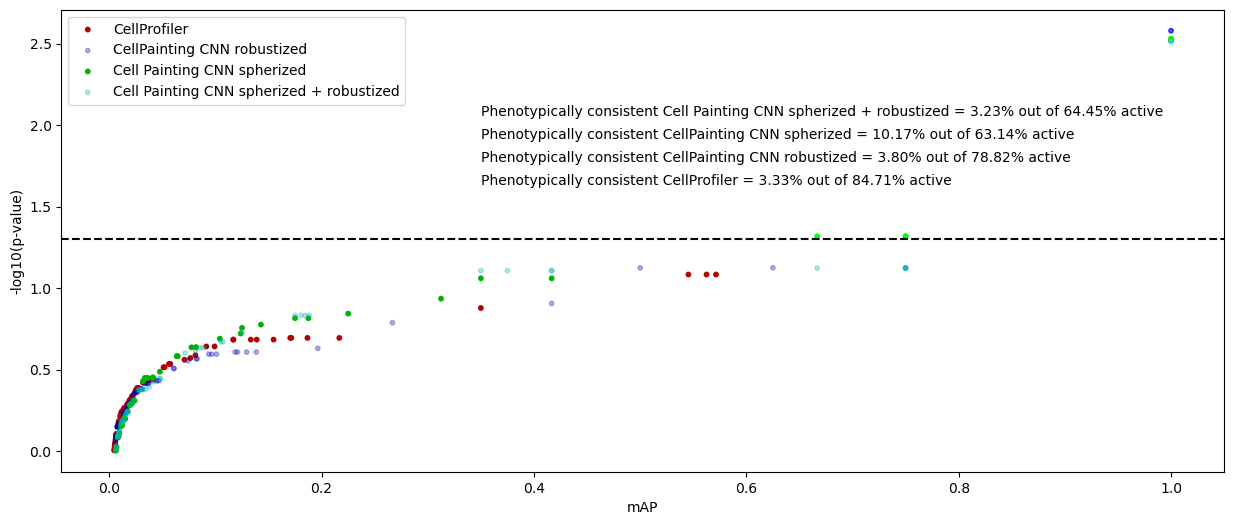

In [21]:
colors = [(0.7, 0, 0), (1, 0, 0)]
cmr = LinearSegmentedColormap.from_list("Red", colors, N=2)
colors = [(0, 0.7, 0), (0, 1, 0)]
cmg = LinearSegmentedColormap.from_list("Green", colors, N=2)
colors = [(0, 0, 0.7, 0.3), (0, 0, 1, 0.3)]
cmb = LinearSegmentedColormap.from_list("Blue", colors, N=2)
colors = [(0, 0.7, 0.7, 0.3), (0, 1, 1, 0.3)]
cmgb = LinearSegmentedColormap.from_list("GB", colors, N=2)

plt.figure(figsize=(15,6))
plt.scatter(data=target_maps_cp, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmr, s=10, label = 'CellProfiler')
plt.scatter(data=target_maps_cpcnn_robustized, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmb, s=10, label = 'CellPainting CNN robustized')
plt.scatter(data=target_maps_cpcnn_spherized, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmg, s=10, label = 'Cell Painting CNN spherized')
plt.scatter(data=target_maps_cpcnn_spherized_mad, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap=cmgb, s=10, label = 'Cell Painting CNN spherized + robustized')

plt.xlabel("mAP")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color="black", linestyle="--")
plt.text(0.35, 1.66, f"Phenotypically consistent CellProfiler = {100*consistent_ratio_cp:.2f}% out of {100*active_ratio_cp:.2f}% active", va="center", ha="left")
plt.text(0.35, 1.8, f"Phenotypically consistent CellPainting CNN robustized = {100*consistent_ratio_cpcnn_robustized:.2f}% out of {100*active_ratio_cpcnn_robustized:.2f}% active", va="center", ha="left")
plt.text(0.35, 1.94, f"Phenotypically consistent CellPainting CNN spherized = {100*consistent_ratio_cpcnn_spherized:.2f}% out of {100*active_ratio_cpcnn_spherized:.2f}% active", va="center", ha="left")
plt.text(0.35, 2.08, f"Phenotypically consistent Cell Painting CNN spherized + robustized = {100*consistent_ratio_cpcnn_spherized_mad:.2f}% out of {100*active_ratio_cpcnn_spherized_mad:.2f}% active", va="center", ha="left")

plt.legend()
plt.show()